In [20]:
import cv2
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions
from keras import layers
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [9]:
DIRECTORY='C:/Users/Adrian/image classification'
TRAIN = 'C:/Users/Adrian/image classification/train'
TEST = 'C:/Users/Adrian/image classification/test'
VALIDATION='C:/Users/Adrian/image classification/validation'
train_dir = os.path.join(DIRECTORY, 'train')
validation_dir = os.path.join(DIRECTORY, 'validation')
test_dir = os.path.join(DIRECTORY, 'test')
CATEGORIES=['cats','dogs','apple','bannana','monkey','orange']
LR = 1e-3
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

In [10]:
for file in train_dir:
    total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
for file in validation_dir:
    total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
for file in test_dir:
    total_test = len(os.listdir(test_dir))

In [11]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        directory=r"./train/",
        target_size=(IMG_HEIGHT,IMG_WIDTH),
        batch_size=128,
        class_mode='binary')
test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
validation_generator = test_datagen.flow_from_directory(
        directory=r"./validation/",
        target_size=(IMG_HEIGHT,IMG_WIDTH),
        batch_size=128,
        class_mode='binary')
test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
datagen = ImageDataGenerator()
test_data = datagen.flow_from_directory('.',classes=['test'])

Found 9153 images belonging to 6 classes.
Found 9153 images belonging to 6 classes.
Found 322 images belonging to 1 classes.


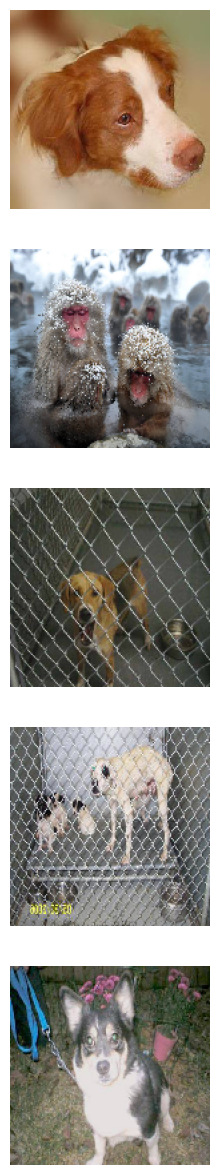

In [13]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
        for img, ax in zip( images_arr, axes):
            ax.imshow(img)
            ax.axis('off')
    else:
        for img, probability, ax in zip( images_arr, probabilities, axes):
            ax.imshow(img)
            ax.axis('off')
            if probability > 0.5:
                ax.set_title("%.2f" % (probability*100) + "% dog")
            else:
                ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

Found 9153 images belonging to 6 classes.


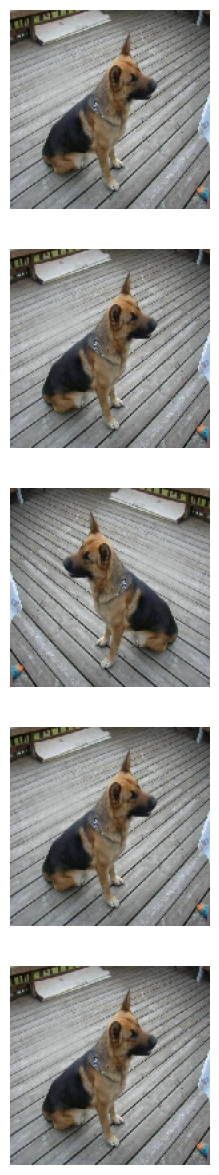

In [14]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [15]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 9153 images belonging to 6 classes.


In [16]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [17]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_5220\2012750395.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
71/71 [==============================] - 424s 6s/step - loss: 0.4923 - accuracy: 0.8333 - val_loss: 4.5577 - val_accuracy: 0.0021
Epoch 2/15
71/71 [==============================] - 289s 4s/step - loss: 0.4507 - accuracy: 0.8333 - val_loss: 4.4662 - val_accuracy: 0.0019
Epoch 3/15
71/71 [==============================] - 293s 4s/step - loss: 0.4507 - accuracy: 0.8333 - val_loss: 4.4486 - val_accuracy: 0.0021
Epoch 4/15
71/71 [==============================] - 292s 4s/step - loss: 0.4506 - accuracy: 0.8333 - val_loss: 4.5061 - val_accuracy: 0.0021
Epoch 5/15
71/71 [==============================] - 287s 4s/step - loss: 0.4506 - accuracy: 0.8333 - val_loss: 4.5136 - val_accuracy: 0.0021
Epoch 6/15
71/71 [==============================] - 278s 4s/step - loss: 0.4506 - accuracy: 0.8333 - val_loss: 4.4576 - val_accuracy: 0.0021
Epoch 7/15
71/71 [==============================] - 281s 4s/step - loss: 0.4506 - accuracy: 0.8333 - val_loss: 4.4681 - val_accuracy: 0.0021
Epoch 8/15
71

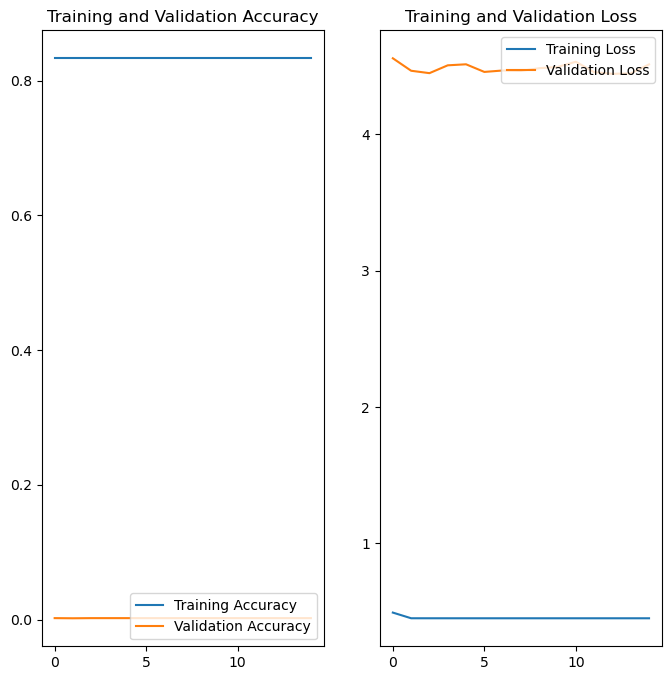

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()